# Que tal ahora LSTM (Long-Short Term Memory)

## Code Structure:
Here's a simplified example of using Keras (a high-level neural networks API) to create an LSTM model and perform time series forecasting in Python:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("EEZ_Fishing_Hours.xlsx",parse_dates=True)

In [3]:
data["label"].unique()

array(['Fiji', 'Micronesia', 'Gilbert Islands', 'Line Group',
       'Phoenix Group', 'Marshall Islands', 'Nauru', 'Palau',
       'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Tuvalu',
       'Vanuatu', 'Samoa'], dtype=object)

In [4]:
data["ym"],data["date"]=pd.to_datetime(data["ym"]),pd.to_datetime(data["date"])

In [5]:
Micronesia=data[data["label"]=="Micronesia"]

In [6]:
Micronesia

,Unnamed: 0,date,ym,geartype,hours,vesselIDs,iso3,label
299,299,2015-01-01,2015-01-01,drifting_longlines,5503.613333,16,FSM,Micronesia
300,300,2015-01-01,2015-01-01,pole_and_line,1342.647500,9,FSM,Micronesia
301,301,2015-01-01,2015-01-01,tuna_purse_seines,1268.013889,38,FSM,Micronesia
302,302,2015-02-01,2015-02-01,drifting_longlines,5129.236111,13,FSM,Micronesia
303,303,2015-02-01,2015-02-01,pole_and_line,817.969167,12,FSM,Micronesia
...,...,...,...,...,...,...,...,...
647,647,2023-09-01,2023-09-01,fishing,20.634444,1,FSM,Micronesia
648,648,2023-09-01,2023-09-01,tuna_purse_seines,220.361667,9,FSM,Micronesia
649,649,2023-10-01,2023-10-01,drifting_longlines,4774.435000,20,FSM,Micronesia
650,650,2023-10-01,2023-10-01,fishing,17.611944,1,FSM,Micronesia


In [7]:
Micronesia=Micronesia.set_index("date")
Micronesia = Micronesia.groupby(pd.Grouper(freq='MS')).sum()


C:\Users\migue\AppData\Local\Temp/ipykernel_10816/3089294042.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Micronesia = Micronesia.groupby(pd.Grouper(freq='MS')).sum()


In [8]:
y=Micronesia["hours"]

In [9]:
# Decompose the time series
y=y.resample("M").sum()
# The term bfill means that we use the value before filling in missing values
y=y.fillna(method='ffill')

<AxesSubplot:xlabel='date'>

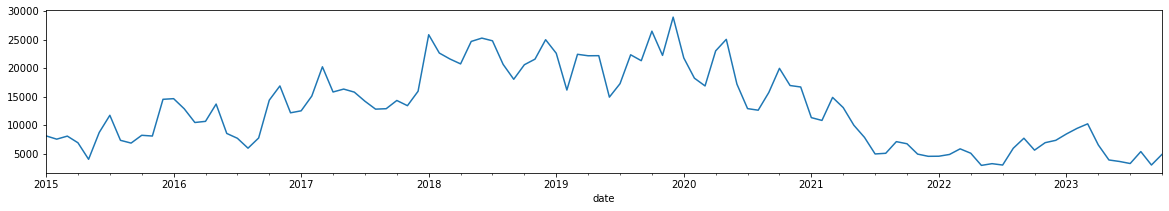

In [10]:
y.plot(figsize=(20,3))

In [11]:
raw_seq=np.array(y.values)

In [12]:
raw_seq

array([ 8114.27472222,  7541.95833333,  8076.09833333,  6905.52388889,
        4013.30805556,  8712.61666667, 11724.41805556,  7337.28055556,
        6853.87888889,  8219.83083333,  8089.27416667, 14527.58805556,
       14639.18888889, 12862.17277778, 10461.9225    , 10662.39      ,
       13692.60777778,  8543.21333333,  7695.95      ,  5960.02944444,
        7747.01194444, 14374.02361111, 16871.78555556, 12162.32611111,
       12508.54805556, 15093.72416667, 20226.19055556, 15809.62916667,
       16319.40361111, 15787.24111111, 14191.53083333, 12803.39833333,
       12880.15555556, 14321.20055556, 13410.85111111, 15939.96527778,
       25848.70583333, 22633.83277778, 21591.65777778, 20734.20916667,
       24671.12388889, 25254.79916667, 24782.33138889, 20658.11916667,
       18038.70833333, 20586.22944444, 21566.69305556, 24974.        ,
       22595.2275    , 16150.30027778, 22417.02916667, 22159.495     ,
       22175.14694444, 14911.34055556, 17266.90722222, 22331.03805556,
      

# 1. Data Preparation
## univariate data preparation

In [13]:
import pandas as pd
import numpy as np

def univariate_data(dataset: pd.Series, start_index: int, end_index: int, history_size: int, target_size: int, future_step:int ):
    """
    Extrae ventanas de datos univariados y etiquetas correspondientes para el entrenamiento del modelo.
    
    Parámetros:
    - dataset (pd.Series): Serie temporal que contiene el conjunto de datos completo.
    - start_index (int): Índice desde el cual se comenzará a considerar el conjunto de datos para crear las ventanas.
    - end_index (int): Índice hasta el cual se considerará el conjunto de datos para crear las ventanas.
    - history_size (int): Cantidad de pasos de tiempo en el pasado que se usarán como características para la predicción.
    - target_size (int): Número de pasos en el futuro que se desea predecir. Es la etiqueta a predecir.
    - future_step (int): Número de puntos consecutivos en el futuro que se incluirán como etiqueta para cada ventana de datos. Define el rango de la etiqueta.
    
    Devuelve:
    - np.array: Array de Numpy que contiene las ventanas de datos univariados como características.
    - np.array: Array de Numpy que contiene las etiquetas a predecir para cada ventana.
    """

    data = []  # Inicializa la lista que contendrá las ventanas de datos históricos.
    labels = []  # Inicializa la lista que contendrá las etiquetas (valores a predecir).

    # Ajusta el índice de inicio para que haya suficientes puntos de datos anteriores para crear la primera ventana.
    start_index = start_index + history_size
    
    # Si el índice final no se proporciona, se ajusta para que haya suficiente espacio para la etiqueta de la última ventana.
    if end_index is None:
        end_index = len(dataset) - target_size

    # Crea las ventanas y etiquetas.
    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))  # Agrega una ventana de datos como características para una predicción.
        labels.append(dataset[i + target_size: i + target_size + future_step])  # Agrega la etiqueta (valor futuro) que corresponde a esta ventana.

    return np.array(data), np.array(labels)

In [14]:
# Extraer los valores de la serie en un array de numpy
uni_data = Micronesia.hours.values

In [15]:
TRAIN_SPLIT = int(len(uni_data) * 0.7) # Se considera que el tamaño de la data de entrenamiento sea del 80% de la data total

future_step = 3 # Número de pasos consecutivos para la predicción
# Calcular la media y la desviación estandar
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

# Hacer la normalización
uni_data = (uni_data-uni_train_mean)/uni_train_std

In [16]:
# Crear los conjuntos de entrenamiento y validación
x_train_uni, y_train_uni = univariate_data(uni_data,0,TRAIN_SPLIT,24,0,future_step)
x_val_uni, y_val_uni = univariate_data(uni_data,TRAIN_SPLIT,len(uni_data)-3,24,0,future_step)

In [17]:
# Crear los indices
def create_time_steps(length):
  return list(range(-length, 0))

<module 'matplotlib.pyplot' from 'c:\\Users\\migue\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

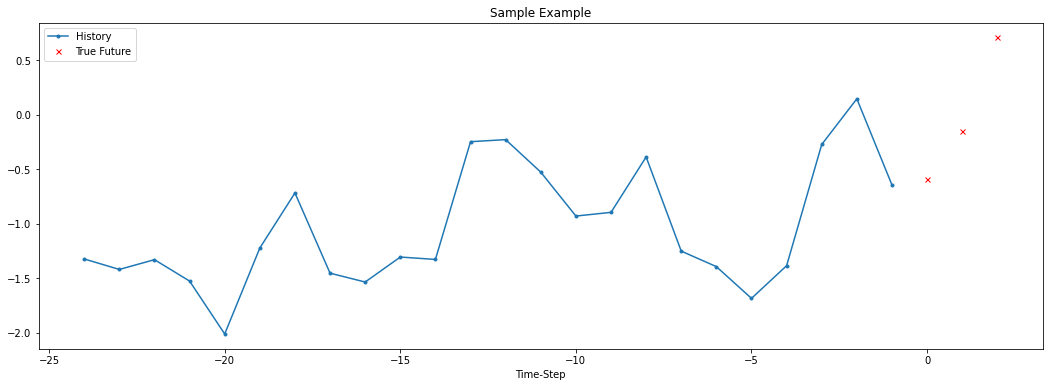

In [18]:
import matplotlib.pyplot as plt

def show_plot(plot_data, delta:int, title:str, future_step:int):
    """
    Genera y muestra un gráfico para visualizar datos históricos, predicciones del modelo y datos verdaderos de una serie temporal.
    
    Parámetros:
    - plot_data (list of np.array): Lista de arrays de Numpy que contienen los datos históricos, el futuro verdadero y la predicción del modelo.
    - delta (int or None): Número de pasos en el tiempo que representará la predicción en el futuro. Si es None, se asume que es 0.
    - title (str): Título del gráfico.
    
    Devuelve:
    - plt: Objeto de Matplotlib con el gráfico configurado.
    """

    labels = ['History', 'True Future', 'Model Prediction']  # Etiquetas para las series en el gráfico.
    marker = ['.-', 'rx', 'g.']  # Marcadores para cada serie en el gráfico.
    
    # Crea los pasos en el tiempo basados en la forma de los datos históricos.
    time_steps = create_time_steps(plot_data[0].shape[0])
    

    future = list(range(delta, delta + future_step))

    plt.figure(figsize=(18,6))
    plt.title(title)  # Establece el título del gráfico.
    
    # Grafica cada serie de datos.
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=5,
                     label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    
    plt.legend()  # Añade una leyenda al gráfico.
    #plt.xlim([time_steps[0], (len(future) + 6) * 2])  # Establece los límites del eje X.
    plt.xlabel('Time-Step')  # Etiqueta del eje X.
    
    return plt

# Mostrar un ejemplo 
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example',future_step)

In [19]:
import tensorflow as tf
# Establece el tamaño del lote (batch) a 256 ejemplos para el entrenamiento.
BATCH_SIZE = 256

# Establece el tamaño del buffer a 10,000 para la aleatorización de los datos.
BUFFER_SIZE = 10000

# Crea un objeto tf.data.Dataset para el conjunto de entrenamiento univariado.
# Se parten los datos y etiquetas en 'slices' para emparejarlos.
train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))

# Realiza varias transformaciones en el objeto Dataset para el conjunto de entrenamiento:
# - cache(): Almacena en caché los elementos para mejorar el rendimiento.
# - shuffle(BUFFER_SIZE): Mezcla los elementos del Dataset aleatoriamente.
# - batch(BATCH_SIZE): Agrupa los elementos en lotes del tamaño especificado.
# - repeat(): Repite el Dataset indefinidamente.
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

# Crea un objeto tf.data.Dataset para el conjunto de validación univariado.
val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))

# Realiza transformaciones en el objeto Dataset para el conjunto de validación:
# - batch(BATCH_SIZE): Agrupa los elementos en lotes del tamaño especificado.
# - repeat(): Repite el Dataset indefinidamente.
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [20]:
# Limpia la sesión de Keras para asegurarse de que comenzamos con un entorno limpio.
tf.keras.backend.clear_session()

# Inicializa un nuevo modelo secuencial de Keras.
simple_lstm_model = tf.keras.models.Sequential([
    # Añade una capa LSTM con 8 unidades. Se espera que los tensores de entrada tengan una forma específica.
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    # Añade una capa densa con una sola unidad para generar la salida.
    tf.keras.layers.Dense(future_step)
])

# Compila el modelo con el optimizador Adam y la función de pérdida MAE.
simple_lstm_model.compile(optimizer='adam', loss='mae')

# Imprime un resumen del modelo.
simple_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 3)                 27        
                                                                 
Total params: 347 (1.36 KB)
Trainable params: 347 (1.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Establece el intervalo de evaluación en 200 pasos de entrenamiento.
EVALUATION_INTERVAL = 200

# Establece el número de épocas de entrenamiento a 20.
EPOCHS = 20

# Inicia el entrenamiento del modelo.
history = simple_lstm_model.fit(
    train_univariate,  # Conjunto de entrenamiento
    epochs=EPOCHS,  # Número de épocas
    steps_per_epoch=EVALUATION_INTERVAL,  # Pasos de entrenamiento en cada época
    validation_data=val_univariate,  # Conjunto de validación
    validation_steps=50  # Pasos de validación al final de cada época
)

Epoch 1/20


200/200 [==============================] - 4s 12ms/step - loss: 0.6012 - val_loss: 1.6775
Epoch 2/20
200/200 [==============================] - 2s 10ms/step - loss: 0.4551 - val_loss: 1.8496
Epoch 3/20
200/200 [==============================] - 2s 10ms/step - loss: 0.3716 - val_loss: 1.8895
Epoch 4/20
200/200 [==============================] - 2s 9ms/step - loss: 0.3450 - val_loss: 1.9039
Epoch 5/20
200/200 [==============================] - 2s 10ms/step - loss: 0.3343 - val_loss: 1.9332
Epoch 6/20
200/200 [==============================] - 2s 11ms/step - loss: 0.3256 - val_loss: 1.9411
Epoch 7/20
200/200 [==============================] - 2s 11ms/step - loss: 0.3197 - val_loss: 1.9491
Epoch 8/20
200/200 [==============================] - 2s 9ms/step - loss: 0.3156 - val_loss: 1.9561
Epoch 9/20
200/200 [==============================] - 2s 10ms/step - loss: 0.3116 - val_loss: 1.9772
Epoch 10/20
200/200 [==============================] - 2s 11ms/step - loss: 0.3082 - val_loss: 1.9932
Ep

1/1 [==============================] - 0s 34ms/step


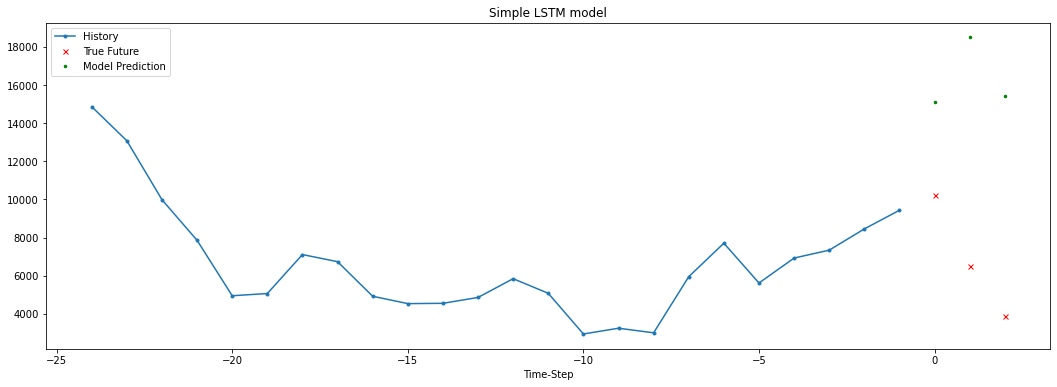

1/1 [==============================] - 0s 48ms/step


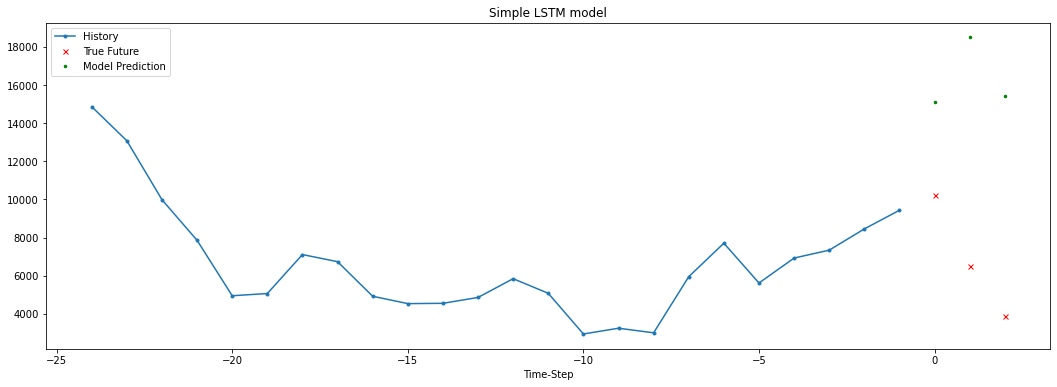

In [33]:
for x, y in val_univariate.take(2):
  plot = show_plot([(x[0].numpy()  * uni_train_std) +  uni_train_mean , (y[0].numpy() * uni_train_std) +  uni_train_mean, 
                    (simple_lstm_model.predict(x)[0] *uni_train_std) + uni_train_mean], 0, 'Simple LSTM model',future_step)
  plot.show()

In [23]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[8114.27472222 7541.95833333 8076.09833333] 6905.52388888888
[7541.95833333 8076.09833333 6905.52388889] 4013.308055555558
[8076.09833333 6905.52388889 4013.30805556] 8712.61666666666
[6905.52388889 4013.30805556 8712.61666667] 11724.41805555556
[ 4013.30805556  8712.61666667 11724.41805556] 7337.28055555553
[ 8712.61666667 11724.41805556  7337.28055556] 6853.878888888886
[11724.41805556  7337.28055556  6853.87888889] 8219.830833333317
[7337.28055556 6853.87888889 8219.83083333] 8089.274166666651
[6853.87888889 8219.83083333 8089.27416667] 14527.58805555548
[ 8219.83083333  8089.27416667 14527.58805556] 14639.18888888882
[ 8089.27416667 14527.58805556 14639.18888889] 12862.17277777775
[14527.58805556 14639.18888889 12862.17277778] 10461.92249999998
[14639.18888889 12862.17277778 10461.9225    ] 10662.39
[12862.17277778 10461.9225     10662.39      ] 13692.607777777686
[10461.9225     10662.39       13692.60777778] 8543.213333333342
[10662.39       13692.60777778  8543.21333333] 7695.94

# 2. Vanilla LSTM
A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction.

We can define a Vanilla LSTM for univariate time series forecasting as follows.

In [24]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [25]:
# demonstrate prediction
x_input = array(raw_seq[-4:-1])
print(x_input)
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat[0][0])
print(raw_seq[-1])

[3271.79083333 5363.33       3011.92222222]
3520.026
4887.41638888888


Hay algunos otros algoritmos que pueden ser usados para datos univariados o para datos multivariados: https://www.kaggle.com/code/ritesh7355/develop-lstm-models-for-time-series-forecasting, y también en el original: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecastings/

In [26]:
train,validation=raw_seq[:-10],raw_seq[-10:]

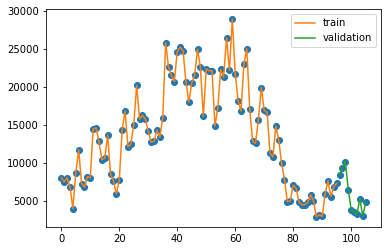

In [27]:
plt.plot(raw_seq,marker="o",lw=0)
plt.plot(range(0,len(train),1),train,label="train")
plt.plot(range(len(train),len(raw_seq),1),validation,label="validation")
plt.legend()
plt.show()

In [28]:
# choose a number of time steps
n_steps = 10
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [29]:
# Last 10 terms of your sequence for prediction
last_sequence = raw_seq[-n_steps:]  # Assuming `n_steps` is the number of steps for each sequence

# Predict the next 10 terms sequentially
predicted_sequence = []
for _ in range(10):
    # Reshape the last sequence for model input
    x_input = last_sequence[-n_steps:]
    x_input = x_input.reshape((1, n_steps, n_features))  # Assuming `n_features` is the number of features

    # Get the prediction for the next term
    yhat = model.predict(x_input, verbose=0)
    
    # Append the prediction to the predicted sequence
    predicted_sequence.append(yhat[0,0])  # Assuming the output shape is (1, 1)
    
    # Update the last sequence with the new prediction for the next iteration
    last_sequence = np.append(last_sequence, yhat[0,0])

# Print or use the predicted sequence for comparison
print("Predicted Sequence:", predicted_sequence)

Predicted Sequence: [4645.6387, 3812.6519, 4410.4873, 4338.2124, 4011.782, 3966.4888, 3991.5298, 3878.745, 3922.9983, 3761.8232]


In [30]:
validation

array([ 8452.16694444,  9431.54666667, 10228.98972222,  6528.695     ,
        3892.83777778,  3630.15138889,  3271.79083333,  5363.33      ,
        3011.92222222,  4887.41638889])

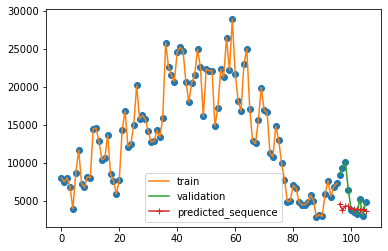

In [31]:
plt.plot(raw_seq,marker="o",lw=0)
plt.plot(range(0,len(train),1),train,label="train")
plt.plot(range(len(train),len(raw_seq),1),validation,label="validation")
plt.plot(range(len(train),len(raw_seq),1),predicted_sequence,label="predicted_sequence",marker="+")
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(predicted_sequence,validation))

2994.3467953492145